<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [4]:
import pandas as pd

Load the dataset into a dataframe.


In [5]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


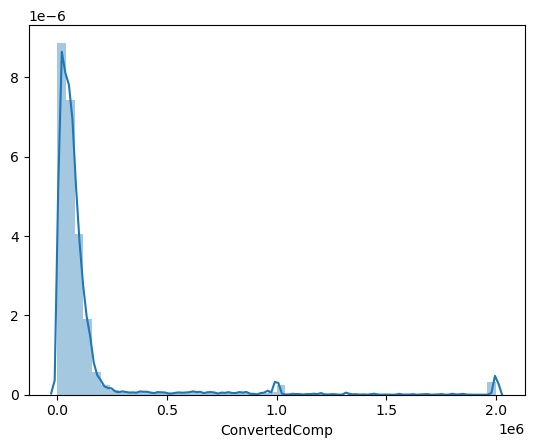

In [7]:
# your code goes here
import seaborn as sns
import matplotlib.pyplot as plt

# Drop NaN values from the 'ConvertedComp' column
df_cleaned = df.dropna(subset=['ConvertedComp'])

# Plot the distribution
sns.distplot(df_cleaned['ConvertedComp'], kde=True)

# Show the plot
plt.show()


Plot the histogram for the column `ConvertedComp`.


(array([9659.,  238.,  115.,  125.,   99.,  131.,   34.,   15.,   15.,
         151.]),
 array([      0.,  200000.,  400000.,  600000.,  800000., 1000000.,
        1200000., 1400000., 1600000., 1800000., 2000000.]),
 <BarContainer object of 10 artists>)

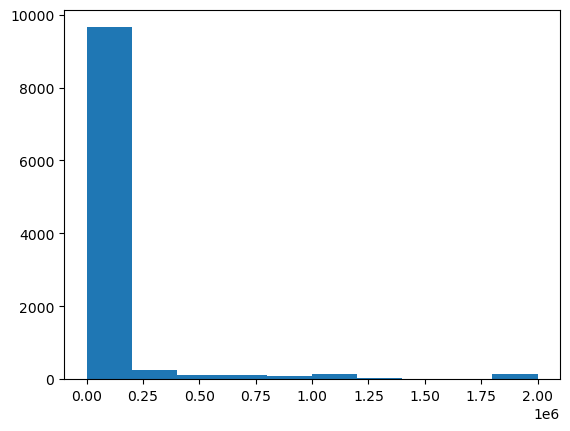

In [8]:
# your code goes here
import matplotlib as mpl
%matplotlib inline 
import matplotlib.pyplot as plt
plt.hist(df['ConvertedComp'])

What is the median of the column `ConvertedComp`?


In [9]:
# your code goes here
df['ConvertedComp'].dropna(axis=0,inplace=True) 
print("ConvertedComp Median:", df['ConvertedComp'].median())

ConvertedComp Median: 57745.0


How many responders identified themselves only as a **Man**?


In [10]:
# your code goes here
df['Gender'].value_counts()

Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: Gender, dtype: int64

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [11]:
# your code goes here
df_woman=df[df['Gender']=='Woman']
print("Woman Median:", df_woman['ConvertedComp'].median())

Woman Median: 57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [12]:
# your code goes here
# Assuming df is your DataFrame
five_number_summary_age = df['Age'].describe(percentiles=[.25, .5, .75])

# Extract relevant statistics from the describe output
min_age = five_number_summary_age['min']
q1_age = five_number_summary_age['25%']
median_age = five_number_summary_age['50%']
q3_age = five_number_summary_age['75%']
max_age = five_number_summary_age['max']

print(f'Minimum Age: {min_age}')
print(f'1st Quartile (Q1): {q1_age}')
print(f'Median Age: {median_age}')
print(f'3rd Quartile (Q3): {q3_age}')
print(f'Maximum Age: {max_age}')


Minimum Age: 16.0
1st Quartile (Q1): 25.0
Median Age: 29.0
3rd Quartile (Q3): 35.0
Maximum Age: 99.0


Plot a histogram of the column `Age`.


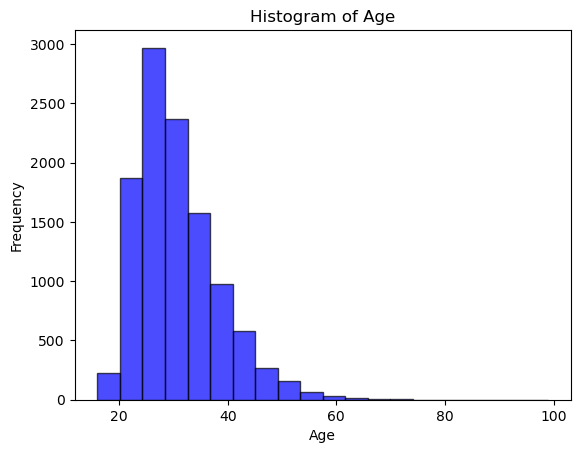

The age group with the highest number of survey respondents is: (24.3, 28.450000000000003)


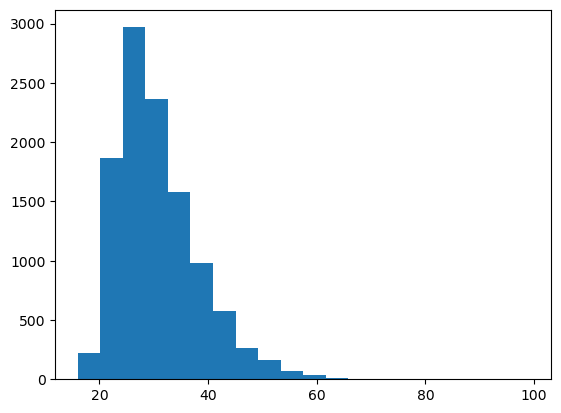

In [19]:
# your code goes here
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
plt.hist(df['Age'], bins=20, color='blue', edgecolor='black', alpha=0.7)

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')

# Display the plot
plt.show()

# Identify the bin edges and frequencies
counts, bin_edges, _ = plt.hist(df['Age'], bins=20)

# Find the index of the maximum frequency
max_freq_index = counts.argmax()

# Identify the age range with the highest frequency
age_range_with_highest_freq = (bin_edges[max_freq_index], bin_edges[max_freq_index + 1])

print(f'The age group with the highest number of survey respondents is: {age_range_with_highest_freq}')




## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


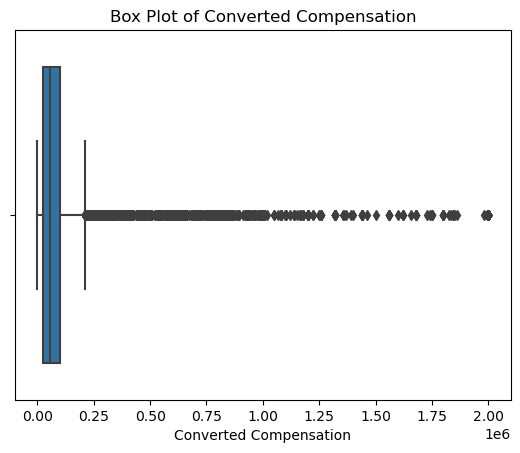

In [22]:
# your code goes here
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
sns.boxplot(x=df['ConvertedComp'])

# Add labels and title
plt.xlabel('Converted Compensation')
plt.title('Box Plot of Converted Compensation')

# Show the plot
plt.show()


Find out the Inter Quartile Range for the column `ConvertedComp`.


In [23]:
# your code goes here
# Assuming df is your DataFrame
median_converted_comp_before = df['ConvertedComp'].median()

print(f'Median ConvertedComp before removing outliers: {median_converted_comp_before}')


Median ConvertedComp before removing outliers: 57745.0


Find out the upper and lower bounds.


In [24]:
# your code goes here
import numpy as np

# Assuming df is your DataFrame

# Calculate the IQR (Interquartile Range)
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_no_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]

# Calculate the median after removing outliers
median_converted_comp_after = df_no_outliers['ConvertedComp'].median()

# Calculate the mean after removing outliers
mean_converted_comp_after = df_no_outliers['ConvertedComp'].mean()

print(f'Median ConvertedComp after removing outliers: {median_converted_comp_after}')
print(f'Mean ConvertedComp after removing outliers: {mean_converted_comp_after}')


Median ConvertedComp after removing outliers: 52704.0
Mean ConvertedComp after removing outliers: 59883.20838915799


Identify how many outliers are there in the `ConvertedComp` column.


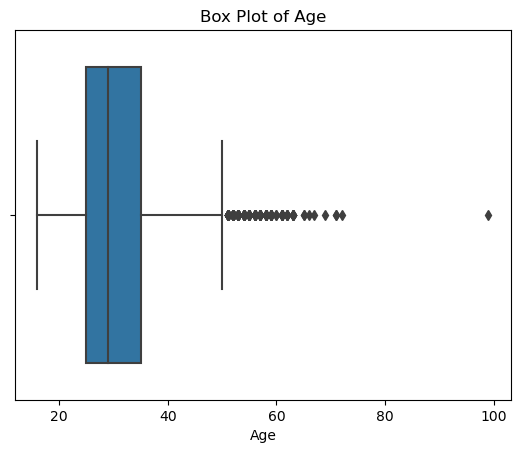

Number of outliers below Q1: 0


In [25]:
# your code goes here
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
sns.boxplot(x=df['Age'])

# Add labels and title
plt.xlabel('Age')
plt.title('Box Plot of Age')

# Show the plot
plt.show()

# Calculate Q1 and IQR
Q1 = df['Age'].quantile(0.25)
IQR = df['Age'].quantile(0.75) - Q1

# Define the lower bound for outliers
lower_bound = Q1 - 1.5 * IQR

# Count the number of outliers below Q1
outliers_below_Q1 = df[df['Age'] < lower_bound]['Age'].count()

print(f'Number of outliers below Q1: {outliers_below_Q1}')


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [ ]:
# your code goes here


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [28]:
# your code goes here
# Assuming df is your DataFrame
correlation_matrix = df.corr()

# Find the column with the highest positive correlation with "Age"
highest_positive_corr_column = correlation_matrix['Age'].idxmax()

# Find the column with the highest negative correlation with "Age"
highest_negative_corr_column = correlation_matrix['Age'].idxmin()

print(f'Column with the highest positive correlation with "Age": {highest_positive_corr_column}')
print(f'Column with the highest negative correlation with "Age": {highest_negative_corr_column}')

print('below')
# Assuming df is your DataFrame
correlation_with_age = df.corr()['Age']

# Display the correlation with "Age" for all numerical columns
print(correlation_with_age)


Column with the highest positive correlation with "Age": Age
Column with the highest negative correlation with "Age": CodeRevHrs
below
Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
